In [417]:
import seaborn as sns
import pandas as pd
import ast
from datetime import datetime,date
import numpy as np


data=pd.read_excel('Desktop/data_cleansing/Killa.xlsx')
#Convert string to dict
data['transaction']=data['transaction'].apply(lambda x:ast.literal_eval(x))
print(data.info())
print(data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   First Name   127 non-null    object
 1   Last Name    127 non-null    object
 2   transaction  127 non-null    object
dtypes: object(3)
memory usage: 3.1+ KB
None
  First Name    Last Name                                        transaction
0    nooeukw  uuoaklowalb  {'tx_id': '5ed3d67b8723c11444c43283', 'tx_date...
1    angulbo        seagn  {'tx_id': '5ed3d67b8723c11444c43283', 'tx_date...
2     dukowi    eukloomja  {'tx_id': '5ed3d67b8723c11444c43283', 'tx_date...
3  ltuoawiob   uuilawobmn  {'tx_id': '5ed3d67b8723c11444c43283', 'tx_date...
4    nakuolo       donald  {'tx_id': '5ed3d67b8723c11444c43283', 'tx_date...


# Splitting the dictionary


In [418]:
for i in data['transaction'][0].keys():
        data[i]=data['transaction'].apply(lambda x: x[i][0].split()[0] if(i=='dob') else x[i])
        
#Remove time stamp from dob column
data['dob']=pd.to_datetime(data['dob'],errors='coerce').apply(lambda x:x.date())

#get today's date 
curr_date=date.today()

#Calculate age dob - current date
data['Age']= (curr_date-data['dob']).dt.days.div(365.25).round(0)

#Calculate mean,median, std
mean_age=np.mean(data.Age[data['Age'].isna()== False])
median_age=np.median(data.Age[data['Age'].isna()== False])
std_age=np.std(data.Age[data['Age'].isna()== False])
print('Mean age is:'+str(mean_age)+'\n'+'Median age is:' +str(median_age)+'\n'+ 'Standard Deviation is:' +str(std_age))



data.Age.fillna(mean_age,inplace=True)
data['Age'] = data['Age'].astype(int)
data_new=data[['First Name','Last Name','tx_date','tx_amount','tx_channel','bank_name','Age']]
data_new.head(5)

Mean age is:33.62222222222222
Median age is:32.0
Standard Deviation is:8.67509561622333


,First Name,Last Name,tx_date,tx_amount,tx_channel,bank_name,Age
0,nooeukw,uuoaklowalb,2020-06-13T05:28:47.543000Z,6192,web,QBank,28
1,angulbo,seagn,2020-06-12T20:22:38.986000Z,38445,mobile,ABank,33
2,dukowi,eukloomja,2020-06-13T06:00:46.904000Z,29627,mobile,GBank,29
3,ltuoawiob,uuilawobmn,2020-06-13T16:10:51.479000Z,27791,web,KBank,40
4,nakuolo,donald,2020-06-13T05:28:47.543000Z,6192,web,QBank,33










# Top Five(5) Ages

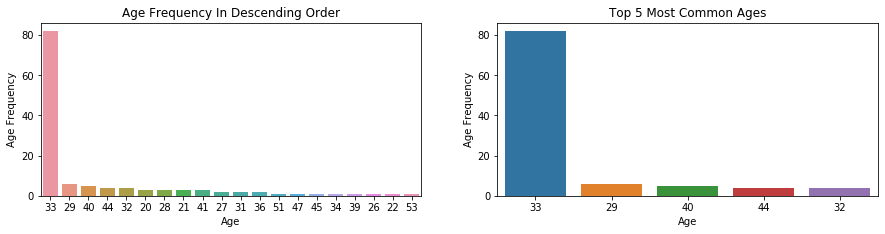

    Age  Frequency
9    33         82
6    29          6
13   40          5
15   44          4
8    32          4


In [416]:
from matplotlib import pyplot as plt
import seaborn as sns


data_new_grp=data_new.groupby('Age').count().rename(columns={'First Name':'Frequency'})
data_new_grp.reset_index(inplace=True)
data_new_sorted=data_new_grp.sort_values(by=['Frequency'],ascending=False)
customer_age_count=data_new_sorted['Frequency']
customer_age=data_new_sorted.Age.unique()
# Filter Top 5
top5=data_new_sorted.head(5)
fig=plt.figure(figsize=(15,7))
fig.add_subplot(222)
bar1=sns.barplot(top5.Age,top5['Frequency'],estimator=np.mean,order=top5.Age)
plt.ylabel('Age Frequency')
plt.xlabel('Age')
plt.title('Top 5 Most Common Ages')
fig.add_subplot(221)
bar2=sns.barplot(customer_age,customer_age_count,estimator=np.mean,order=customer_age,orient='v')
plt.ylabel('Age Frequency')
plt.xlabel('Age')
plt.title('Age Frequency In Descending Order')

def autolabel(rects):
    for rect in rects:
        height=rect.get_height()
        ax.text(rect.get_x() +rect.get_width()/2.,1.05*height,'%d' % int(height), ha='center',va='bottom')

plt.show()
print(top5[['Age','Frequency']])

# Bank with highest volume of transactions

  bank_name  tx_amount
0     ABank    1230240
1     GBank     948064
2     KBank     861521
3     QBank     198144


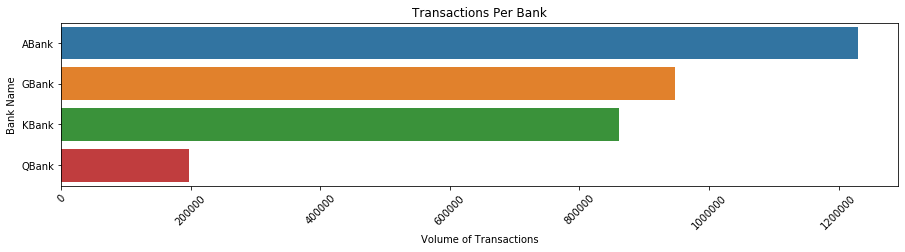

In [394]:
bank_name=list(set(data_new['bank_name']))
bank_trans_count=data_new.groupby('bank_name').sum()
bank_trans_count.reset_index(inplace=True)
print(bank_trans_count[['bank_name','tx_amount']])
plt.figure(figsize=(15,3))
sns.barplot(x='tx_amount',y='bank_name',data=bank_trans_count,orient='h')
plt.xticks(rotation=45)
plt.ylabel('Bank Name')
plt.xlabel('Volume of Transactions')
plt.title('Transactions Per Bank')
plt.show()

# Distribution by Channel

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

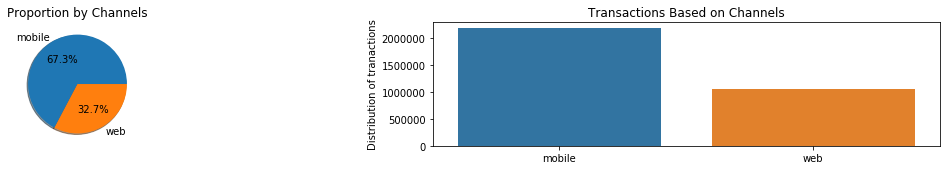

In [414]:
channel_name=list(set(data_new['tx_channel']))
channel_trans_count=data_new.groupby('tx_channel').sum()['tx_amount']
fig=plt.figure(figsize=(20,5))
fig.add_subplot(221)
plt.pie(x=channel_trans_count,labels=channel_name,autopct='%1.1f%%',shadow=True)
plt.title('Proportion by Channels')
fig.add_subplot(222)
sns.barplot(channel_name,channel_trans_count)
plt.ylabel('Distribution of tranactions')
plt.title('Transactions Based on Channels')
plt.plot